# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<html>
<head>
<title>HTML код таблицы, примеры</title>
</head>
<body>
<table border="1" table-layout: fixed>
<tr>
<td style="background-color:#ffffcc"><font size="3"><b>Шаг 2. Предобработка данных</b></font></td>
<td style="background-color:#ffffcc"><font size="3"><b>Шаг 3. Добавить в таблицу:</b></font></td>
<td style="background-color:#ffffcc"><font size="3"><b>Шаг 4. Анализ данных:</b></font></td>
<td style="background-color:#ffffcc"><font size="3"><b>Шаг 5.</b></font></td>
</tr>
<tr>
<td>1. Определяем и изучаем пропущенные значения</td>
<td>1. Цену квадратного метра. </td>
<td>1. Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.</td>
<td><font size="3"><b>Пишем вывод</b></font><br/>. </td>
</td>
</tr>
<tr>
<td>2. Заполняю пропуски, где это возможно. Объяснить, почему заполняю/не заполняю пропуски</td>
<td>2. День недели, месяц и год публикации объявления. </td>
<td>2. Изучаем время продажи квартиры. Строим гистограмму. Считаем среднее и медиану. Описываем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</td>
<td> &nbsp; </td>
</td>
</tr>
<tr>
<td>3. Привести данные к нужным типам (с пояснением выбора типа). </td>
<td>3. Этаж квартиры; варианты — первый, последний, другой. </td>
<td>3. Убираем редкие и выбивающиеся значения. Описываем, какие особенности обнаружили.</td>
<td> &nbsp; </td>
</tr>
<tr>
<td> &nbsp; </td>
<td>4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.</td>
<td>4. Какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучаем зависимость от даты размещения: дня недели, месяца и года.</td>
<td> &nbsp; </td>
</tr>
<tr>
<td> &nbsp; </td>
<td> &nbsp; </td>
<td>5. Выбираем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра в этих населённых пунктах. Выделяем населённые пункты с самой высокой и низкой стоимостью жилья.</td>
<td> &nbsp; </td>
</tr>
<tr>
</tr>
</table>
</body>
</html>

### **Шаг 1**: Откройте файл с данными и изучите общую информацию. 

#### Загрузите данные из файла в датафрейм.

In [1]:
# импортируем нужные нам библиотеки
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime  # для получения дня недели из даты
pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas
data = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t", decimal = ",")

data.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.3,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.0,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: существуют много пропусков в данной дате. Я вижу что нужно будет изменить тип данных в столбце `first_day_exposition` в `datetime data type` с помощью `pandas.to_datetime()` code.

####  Изучите общую информацию о полученном датафрейме.

In [2]:
# изучаем данные

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Пропуски в столбца: (зная что `RangeIndex` is `23699`)

**Почти нет данных в этих столбцах**:

- `is _appartment` (почти все данные в форме `NaN`)
- `ponds_nearest` (почти все данные в форме `NaN`)

**В этих столбцах есть достаточно много пропусков**:


- `balcony` (почти половина данных находится в `NaN`)
- `ceiling_height`(почти половина данных находится в `NaN`)
- `airports_nearest` (почти половина данных находится в `NaN`)
- `citycenter_nearest` (почти половина данных находится в `NaN`)
- `parks_around_3000` (почти половина данных находится в `NaN`)


**В этих столбцах есть несколько тысяч пропусков**:

- `floor_total` (несколько тысяч находятся в `NaN`)
- `living_area` (несколько тысяч находятся в `NaN`)
- `kitchen_area` (несколько тысяч находятся в `NaN`)
- `locality_name`(несколько тысяч находятся в `NaN`)
- `days_exposition` (несколько тысяч находятся в `NaN`)


Нужно будет изменить тип двнных `first_day_exposition` в типе "дата" исспользуя `to_datetime`.

Dtype of `first_day_exposition` is `object`


#### Постройте общую гистограмму для всех числовых столбцов таблицы.

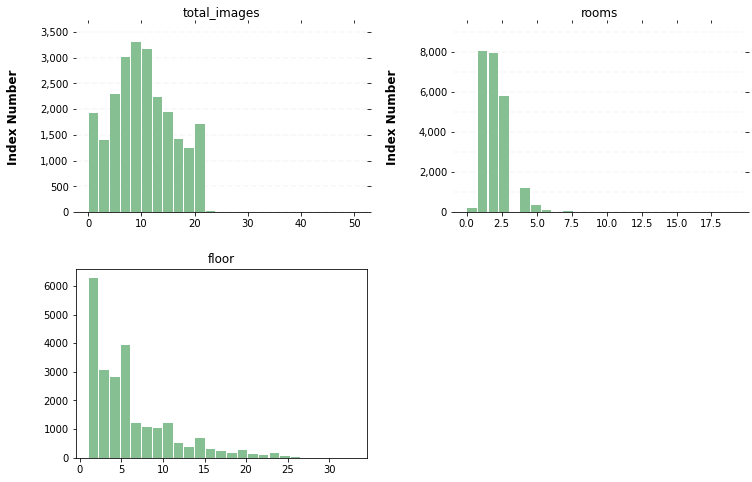

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

#data.hist(figsize = (50,25), bins = 50, ec = 'black')

#data['floor'].max()
#data['total_images'].max()
#data['rooms'].max()

#data.describe()

ax = data.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


    # Set x-axis label
    x.set_xlabel( " ",labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel( "Index Number",labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Вывод:

**Aнализ гистограммы `total_images`**:

- `total_images` диапазон примерно между `range = (0,50)`
- Максимальное значение  `total_images` - 50 фотографии
- Минималльное значение`total_images`  - 0 фотографии
- среднее значение `total_images` Гистограмма  ~ 10 фотографии
- Медианное значение `total_images` - 9 фотографии

**Aнализ гистограммы `room`**:

-  `room` диапазон примерно между `range = (0,19)`
- Максимальное значение`room` - 19 комнат
- the minimuim значение`room`  - 0 комнаты
- среднее значение `room` Гистограмма  ~ 2 комнат
- Медианное значение `room` - 2 комнат

**Aнализ гистограммы `floor`**:

-  `floor` диапазон примерно между `range = (0,33)`
- Максимальное значение`floor`- это 33 потолок
- Минималльное значение `floor` - 1 потолок
- среднее значение `floor` Гистограмма ~ 6 потолок
- Медианное значение `floor` - 4 потолок

### <a name="2."></a>Шаг 2. Предобработка данных
<font size="2">([к содержанию](#0.0))</font>

#### Найдите и изучите пропущенные значения в столбцах.

- Определите, в каких столбцах есть пропуски.

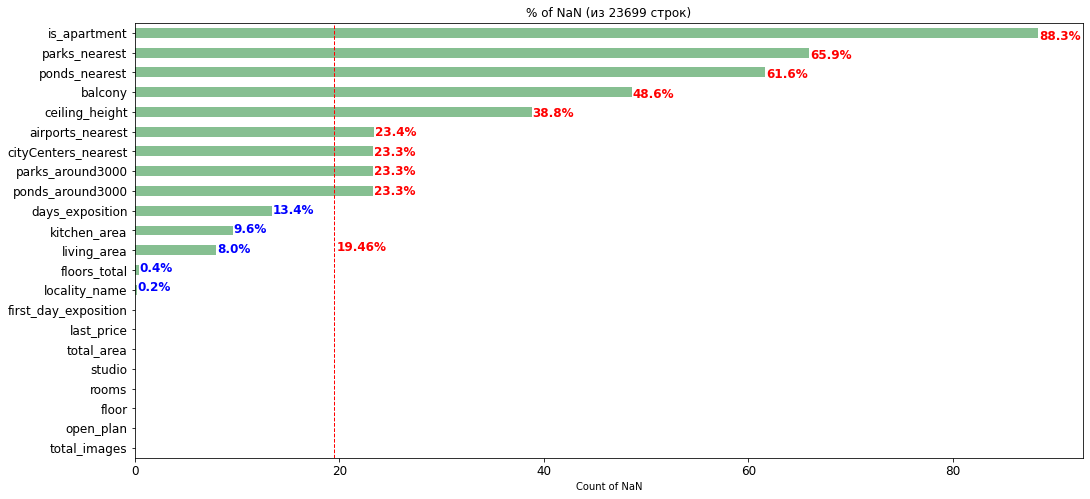

In [4]:
data.isna().sum().sort_values()
#pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')
# мы использовали `sort_values()`, чтобы наш результат выглядел более организованным.

def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(1)
    threshold = percent_of_nulls.mean()
    # above_threshold = np.maximum(percent_of_nulls - threshold, 0)
    # below_threshold = np.minimum(percent_of_nulls, threshold)
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из 23699 строк)', 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    return ax, threshold

plot, threshold = percent_hbar(data)

<a name="1.3."></a>Мы видим, что есть 5 столбцов, где процент содержания NaN крайне велик (от 39% и до 88%).<br/>
Назову их и пока предположу решение:<br/>

<br/><br/>

* <font color=#FF9933><b>is_apartment</b></font> - могу предположить, что "нет данных" там, где ответ - "0", т.е. это не апартаменты. Причиной может быть следующее: не многие люди (в том числе и я ранее) особо не знали разницы между апартаментами и квартирами, это вело к тому, что люди, которые продавали квартиры, при заполнении формы для создания объявления просто пропускали эти пункты, т.к. особо не понимали, что их спрашивали. И наоборот, владельцы апартаментов точно в курсе, что у них апартаменты (раз уж они их приобрели, значит, они разбираются в этом вопросе), поэтому по ним данные оказались заполненными. Взглянм на то, какие значения присутствуют, и примем решения по вопросу заполнения пропусков;
* <font color=#FF9933><b>parks_nearest, ponds_nearest</b></font> - вполне возможно, что данные просто не были выгружены системой. Беря в расчет то, что это далеко не самые важные параметры, и отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски, учитывая, что есть достаточное количество строк, где данные присутствуют, и по ним можно сделать срез и заметить определенные тенденции;
* <b>balcony</b> - вполне возможно, что где балкон отсутствует, там вместо 0 стоит NaN. Необходимо проверить, действительно ли по столбцу balcony присутствует только значение "1", говорящее, что балкон есть, а "0" - отсутствует;
* <b>ceiling_height</b> - довольно важная информация, но она отсуствует. Предполагаю, что некоторые не считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того, чтоб узнать высоту своих потолков, иначе бы данные присутствовали. Будем смотреть, как можно заполнить. Вполне возможно, это будет средний показатель ceiling_height по населенному пункту.
* <font color=#FF9933><b>days_exposition</b></font> - довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет. Тем не менее, проставлять информацию о сроках продажи наугад не стоит. Здесь "среднее"/"медиана" не подойдут. Можно было бы посмотреть, как продавались квартиры с теми же параметрами, но кто знает, может, в какой-то из квартир трубы текут и воняет, что может сильно влиять на конечный срок продажи, а этих данных в таблице уже нет. Поэтому оставляем этот столбец в покое.


* <b>airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000</b>:<br/>
     - По <font color=#FF9933><b>airports_nearest, cityCenters_nearest</b></font>: данные рассчитывала система. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего.<br/>
     - По <b>parks_around3000, ponds_around3000</b>: аналогично как и с <b>parks_nearest</b> и <b>ponds_nearest</b> - данные просто не были заполнены. Пропуски в них не трогаем;
* <font color=#FF9933><b>days_exposition</b></font> - довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет;
* <font color=#FF9933><b>kitchen_area, living_area</b></font> - данные, которые могут быть не заполнены просто по той причине, что они необязательны к заполнению, а высчитывать жилую площадь/площадь кухни продавцам некогда. Также выясним, нет ли такой связи, что если квартира - студия, то там отсутствуют эти данные. Ведь в них нет явного деления площади на ту, которая относится к кухне, и ту, которая относится к жилой площади;
* <font color=#FF9933><b>floors_total</b></font> - данные могут отсутствать по причине необязательности заполнения этих столбцов. Учитывая, что вариативность этажности в зданий довольно сильно коррелирует с местонахождением здания (например, в центре СПб здания сильно ниже, чем на окраине города), заполним эти данные в соответствии с этой логикой;
* <font color=#FF9933><b>locality_name</b></font> - выглядит довольно странно, когда не указывают населенный пункт. Предположу, что свойственно это тем продавцам, которые уверены, что всем очевидно, что если они выставляют квартиру на продажу в разделе сайта "Санкт-Петербург", то и квартира в Санкт-Петербурге, не подозревая даже, что это может быть и Лен. область. Тем не менее, заполним данные только по тем строкам, где указано расстояние до центра. От центра до окраин города в среднем 17 км расстояния, те квартиры, которые находятся в пределах 17 км от центра, получат "Санкт-Петерубург" вместо пропусков.

- Заполните пропущенные значения там, где это возможно.

In [5]:
#data.mean()

In [6]:
data.median().astype(int)

total_images                 9
last_price             4650000
total_area                  52
rooms                        2
ceiling_height               2
floors_total                 9
living_area                 30
floor                        4
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 9
balcony                      1
airports_nearest         26726
cityCenters_nearest      13098
parks_around3000             0
parks_nearest              455
ponds_around3000             1
ponds_nearest              502
days_exposition             95
dtype: int64

In [7]:
# заполнение пропусков для столбца is_apartment 
# avg_is_apartment = data['is_apartment'].mean()
#data['is_apartment'] = data['is_apartment'].fillna(value = 0)

# заполнение пропусков для столбца ceiling_height 
#avg_ceiling_height = data['ceiling_height'].median()
#data['ceiling_height'] = data['ceiling_height'].fillna(value = avg_ceiling_height)

# заполнение пропусков для столбца floors_total 
#avg_floors_total = data['floors_total'].median()
#data['floors_total'] = data['floors_total'].fillna(value = avg_floors_total)

# заполнение пропусков для столбца living_area 
#avg_living_area = data['living_area'].median()
#data['living_area'] = data['living_area'].fillna(value = avg_living_area)

# заполнение пропусков для столбцаkitchen_area 
#avg_kitchen_area = data['kitchen_area'].median()
#data['kitchen_area'] = data['kitchen_area'].fillna(value = avg_kitchen_area)

# заполнение пропусков для столбца balcony 
#avg_balcony = data['balcony'].median()
#data['balcony'] = data['balcony'].fillna(value = 0)

# заполнение пропусков для столбца airports_nearest 
#avg_airports_nearest = data['airports_nearest'].median()
#data['airports_nearest'] = data['airports_nearest'].fillna(value = avg_airports_nearest)

# заполнение пропусков для столбца cityCenters_nearest 
#avg_cityCenters_nearest = data['cityCenters_nearest'].median()
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value = avg_cityCenters_nearest)

# заполнение пропусков для столбца parks_around3000 
#avg_parks_around3000 = data['parks_around3000'].median()
#data['parks_around3000'] = data['parks_around3000'].fillna(value = avg_parks_around3000)

# заполнение пропусков для столбца parks_nearest 
#avg_parks_nearest = data['parks_nearest'].median()
#data['parks_nearest'] = data['parks_nearest'].fillna(value = avg_parks_nearest)

# заполнение пропусков для столбца ponds_around3000 
#avg_ponds_around3000 = data['ponds_around3000'].median()
#data['ponds_around3000'] = data['ponds_around3000'].fillna(value = avg_ponds_around3000)

# заполнение пропусков для столбца ponds_nearest 
#avg_ponds_nearest = data['ponds_nearest'].median()
#data['ponds_nearest'] = data['ponds_nearest'].fillna(value = avg_ponds_nearest)

# заполнение пропусков для столбца days_exposition 
#avg_days_exposition = data['days_exposition'].median()
#data['days_exposition'] = data['days_exposition'].fillna(value = avg_days_exposition)


# мы не смогли заполнить пропуски в столбце locality_name,

Ужасно выглядит,посмотрим что можем сделать..

* <a name="2.1.2."></a><b>is_apartment</b>

заполняем пропуски,идем по порядку

In [8]:
print('Количество NaN в столбце is_apartment:', data['is_apartment'].isnull().sum())
data['is_apartment'].value_counts()

Количество NaN в столбце is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

Видим, что присутствуют оба значения. Тем не менее, заполнять пропуски значением False не будем, т.к. если мы это сделаем, то мы скажем, что во всём датафрейме (>20000 строк) всего 50 апартаментов, что, на мой взгляд, не может соотноситься с реальностью.

* <a name="2.1.2."></a><b>parks_nearest, ponds_nearest</b> (парки, водоемы в радиусе 3км) и сразу же <b>parks_around3000, ponds_around3000</b>.<br/>
Как и писал выше, не трогаем их.
<br/> 


* <b><a name="2.1.3."></a>balcony</b> - где данные отсутствуют, проставим нули - балкон отсутствует.<br/> 


In [9]:
data['balcony'] = data['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', data['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


* <b>ceiling_height</b>. Оставим на попозже. Почему? <br/>

Согласитесь, что у нас в Питере можно сказать, какой высоты будут потолки, если сказать, где находится квартира. Поэтому категоризируем все строки по удаленности от центра (где это возможно) и возьмем среднее по высоте потолков там, чтоб заполнить пропуски.<br/> (the comment of the reviewer: its better to use the mean,but after processing the outliers)

Чтобы это сделать по максимально возможному количеству пропусков, необходимо заполнить пропуски по столбцам <b>cityCenters_nearest</b> и <b>airports_nearest</b> (заодно).

* <a name="2.1.4."></a><b>airports_nearest, CityCenters_nearest</b>:<br/> 

In [10]:
print('Количество NaN по airports_nearest:', data['airports_nearest'].isnull().sum())
print('Количество NaN по cityCenters_nearest:', data['cityCenters_nearest'].isnull().sum())

Количество NaN по airports_nearest: 5542
Количество NaN по cityCenters_nearest: 5519


Посмотрим, в каждой ли строке, где NaN в <b>airports_nearest</b>, есть NaN в <b>cityCenters_nearest</b> и в <b>ponds_around3000</b>:

In [11]:
print('Попарно NaN в airports_nearest и в cityCenters_nearest в {} строках'.
      format(data.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest').shape[0]))

Попарно NaN в airports_nearest и в cityCenters_nearest в 5518 строках


Фактически, так и получается. Выходит датафрейм с количеством строк, равным количеством NaN по каждому из этих столбцов.<br/>
Однако, так просто мы не можем заполнить нулями <b>airports_nearest</b> и <b>cityCenters_nearest</b> - там нет ограничения по радиусу (как в тех же парках/водоемах), т.е. расстояние должно быть в любом случае.<br/><br/>
Создадим список уникальных городов, где отсутствуют данные в столбцах <b>airports_nearest</b> и <b>cityCenters_nearest</b>:

In [12]:
list_of_cities_NaN_airport_center = data.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest')['locality_name'].unique()

In [13]:
!pip install geopy

     |████████████████████████████████| 119 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 4.3 MB/s  eta 0:00:01


In [14]:
cities_with_NaN_airport_center = pd.DataFrame({'Город':list_of_cities_NaN_airport_center})
cities_with_NaN_airport_center.head()

,Город
0,городской посёлок Янино-1
1,посёлок Мурино
2,Сертолово
3,деревня Кудрово
4,Коммунар


In [15]:
cities_with_NaN_airport_center.isnull().sum()

Город    1
dtype: int64

Дропнем эту строку с городом NaN:

In [16]:
cities_with_NaN_airport_center = cities_with_NaN_airport_center.dropna().reset_index(drop=True)
cities_with_NaN_airport_center.isnull().sum()

Город    0
dtype: int64

- ceiling_height

In [17]:
data['ceiling_height'].isnull().sum()

9195

Категоризируем все строки по удаленности от центра (где это возможно) и возьмем среднее по высоте потолков там, чтоб заполнить пропуски.<br/><br/>

Градировать будем так:<br/>
* 0-2км от центра (категория 'самый центр');
* 2-5км от центра (категория 'центр');
* 5-17км от центра (категория 'близко');
* \>17км от центра (категория 'пгт').

Так выглядит логично: 0-2,5 км - квартира у Дворцовой, 2-5 км - квартира на ВО, 5-17км - квартира на Парнасе или в Купчино. > 17км - за КАДом.

Напишем под это функцию:

In [18]:
def fillna_ceiling_height(row):
    if row['cityCenters_nearest'] < 2500:
        return 'самый центр'
    elif row['cityCenters_nearest'] < 5000:
        return 'центр'
    elif row['cityCenters_nearest'] < 17000:
        return 'в пределах города'
    elif row['cityCenters_nearest'] >= 17000:
        return 'область'

Применяем её:

In [19]:
list_to_int = ['cityCenters_nearest', 'ceiling_height', 'floors_total']

for column in list_to_int:
    data[column] = data[data[column].notnull()][column].apply(pd.to_numeric)

In [20]:
data['fromcenter_category'] = data.apply(fillna_ceiling_height, axis=1)

Смотрим на результат:

In [21]:
#data.info()

In [22]:
data[['locality_name', 'cityCenters_nearest', 'fromcenter_category']].head(10)

,locality_name,cityCenters_nearest,fromcenter_category
0,Санкт-Петербург,16028.0,в пределах города
1,посёлок Шушары,18603.0,область
2,Санкт-Петербург,13933.0,в пределах города
3,Санкт-Петербург,6800.0,в пределах города
4,Санкт-Петербург,8098.0,в пределах города
5,городской посёлок Янино-1,NaN,None
6,посёлок Парголово,19143.0,область
7,Санкт-Петербург,11634.0,в пределах города
8,посёлок Мурино,NaN,None
9,Санкт-Петербург,15008.0,в пределах города


Заполним пропуски в столбце <b>ceiling_height</b> средним по каждой группе <b>fromcenter_category</b> (кроме строк, где NaN в <b>cityCenters_nearest</b> - там мы не можем узнаAть, центр это или, например, почти область, поэтому не будем трогать):

In [23]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [24]:
data.groupby('fromcenter_category')['ceiling_height'].median().sort_values(ascending=False).to_frame()

,ceiling_height
fromcenter_category,
самый центр,3.20
центр,3.08
в пределах города,2.65
область,2.60


In [25]:
list_of_fromcenter_cat = ['самый центр', 'центр', 'близко к центру', 'ближе к области/область']
for column in list_of_fromcenter_cat:
    value_for_filling = data.groupby('fromcenter_category')['ceiling_height'].mean().get(key=column)
    data['ceiling_height'] = data.groupby('fromcenter_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

In [26]:
data['ceiling_height'] = data.groupby('fromcenter_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

Смотрим, как применилось:

In [27]:
data['ceiling_height'].isnull().sum()

5519

Было 9195 пропусков по столбцу <b>ceiling_height</b>, стало 5519
.


In [28]:
data['ceiling_height'] = data

* <a name="2.1.6."></a><b>days_exposition</b><br/> 

In [29]:
print('Количество NaN по days_exposition:', data['days_exposition'].isnull().sum())

Количество NaN по days_exposition: 3181


Как писал выше, довольно важный параметр. Но "среднее"/"медиана" не подойдут. Поэтому оставляем этот столбец в покое.

* <a name="2.1.7."></a><b>kitchen_area, living_area</b> - будем смотреть, важные параметры для расчета дальнейших "собирательных" данных.<br/>

In [30]:
print('Количество NaN по kitchen_area:', data['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', data['living_area'].isnull().sum())

Количество NaN по kitchen_area: 2278
Количество NaN по living_area: 1903


Данные важны, но проставлять среднее было бы некорректно. И в Колпино может быть изба на 2000 квадратов или квартира 50 кв.м., из которых 45 - кухня.

Рассмотрим теорию, что именно по студиям не указана эта информация:

In [31]:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

Лишь малая часть пропусков по этим столбцам относится к студиям. Да и с ними нам нечего делать - не делить же пополам общую площадь. Оставляем как есть.

* <b>floors_total</b> - ещё раз посмотрим количество пропусков и примем решение об их заполнении средним по группам по удаленности от центра:<br/>

In [32]:
print('Количество NaN по floors_total:', data['floors_total'].isnull().sum())

Количество NaN по floors_total: 86


Заполняем пропуски:

In [33]:
list_of_fromcenter_cat = ['самый центр', 'центр', 'близко к центру', 'ближе к области/область']
for column in list_of_fromcenter_cat:
    value_for_filling = data.groupby('fromcenter_category')['floors_total'].mean().get(key=column)
    data['floors_total'] = data.groupby('fromcenter_category')['floors_total'].apply(lambda x: x.fillna(x.mean()))

In [34]:
print('Количество NaN по floors_total:', data['floors_total'].isnull().sum())

Количество NaN по floors_total: 5519


16 пропусков заполнено. Посмотрим, что же осталось:

In [35]:
data.query('floors_total.isnull()')[['floors_total', 'locality_name', 'fromcenter_category', 'cityCenters_nearest']].head(10)

,floors_total,locality_name,fromcenter_category,cityCenters_nearest
5,NaN,городской посёлок Янино-1,None,NaN
8,NaN,посёлок Мурино,None,NaN
12,NaN,Сертолово,None,NaN
22,NaN,деревня Кудрово,None,NaN
30,NaN,Коммунар,None,NaN
37,NaN,поселок городского типа Красный Бор,None,NaN
38,NaN,посёлок Мурино,None,NaN
47,NaN,Гатчина,None,NaN
60,NaN,посёлок Мурино,None,NaN
62,NaN,Сертолово,None,NaN


Это те строки, где отсутствует значение удаленности от центра и нам не удалось его рассчитать по координатам, т.к. название населенного или отутствует, или это Санкт-Петербург. Оставляем эти пропуски, с ними нам ничего не сделать.

И, наконец, <a name="2.1.9."></a><b>locality_name</b>: проверим, есть ли данные по расстоянию от центра города,  чтоб хотя бы предположить, что эта квартира находится в пределах Санкт-Петербурга:
<br/> 

In [36]:
print('Количество NaN по locality_name:', data['locality_name'].isnull().sum())
data[(data['locality_name'].isnull())][['locality_name', 'cityCenters_nearest']].head()

Количество NaN по locality_name: 49


,locality_name,cityCenters_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


Это, фактически, ура. Мы видим, что в части строк, где не указан город, есть информация по расстоянию от центра. Как и выше брали при категоризации по удаленности от центра, возьмем за основу, что < 17 км от центра - это город, > 17 км - область. Т.к. "область" мы проставить не можем, оставим там NaN, а где расстояние будет < 10 км, там проставим "Санкт-Петербург".

Производим эту замену:

In [37]:
data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 10000), 'locality_name'] = data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 10000), 'locality_name'].fillna('Санкт-Петербург')

Проверяем, сократилось ли количество NaN в столбце:

In [38]:
print('Количество NaN по locality_name:', data['locality_name'].isnull().sum())

Количество NaN по locality_name: 24


Да, было 49, стало 24. По 25 заполнили пропуски.<br/>

#### <a name="2.1.10."></a> Обновим данные по пропускам:<br/> 

(<AxesSubplot:title={'center':'% of NaN (из 23699 строк)'}, xlabel='Count of NaN'>,
 16.817391304347826)

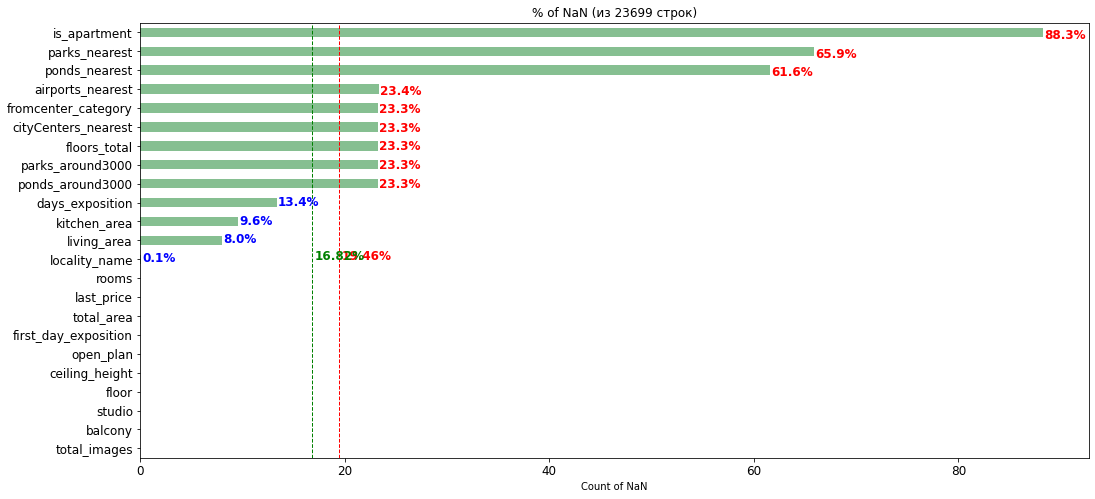

In [39]:
percent_hbar(data, threshold)

С is_apartment лучше не стало, по другим столбцам ситуация с пропусками улучшилась. Такая неважная характеристика данных, как средний процент NaN в столбцах уменьшилась почти на 3%.

fromcenter_category, floors_total, cieling_height, и airports_nearest зависят сейчас от citycenter_nearest.
Если вдруг мы сможем уменшить пропуски в citycenter_nearest, то получится улучить результат графика (значит то, что у нас будут меньше пропусков в наших данных)

In [40]:
# проверяем
data.isna().sum().sort_values()

total_images                0
balcony                     0
studio                      0
floor                       0
ceiling_height              0
open_plan                   0
first_day_exposition        0
total_area                  0
last_price                  0
rooms                       0
locality_name              24
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
floors_total             5519
cityCenters_nearest      5519
fromcenter_category      5519
airports_nearest         5542
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

- Data can go missing due to:
    1. incomplete data entry, 
    2. equipment malfunctions, 
    3. lost files, etc..
    
The real reason that I think it led to missing values is due to some problems occuring after uploading the data to the datasets file

Данные могут исчезнуть из-за:
    1. неполный ввод данных,
    2. неисправности оборудования,
    3. потерянные файлы и т.д..
     
Настоящая причина, по которой я думаю, что это привело к отсутствующим значениям, связана с некоторыми проблемами, возникающими после загрузки данных в файл наборов данных.

#### Рассмотрите типы данных в каждом столбце.

In [41]:
# изменение следующих столбцов на подходящий тип данных

#,'living_area','kitchen_area','total_area'
data[['living_area',
      'kitchen_area',
      'ceiling_height',
      'total_area',
      'last_price' ]] = (data[['living_area',
                              'kitchen_area',
                              'ceiling_height',
                              'total_area',
                               'last_price']]).apply(pd.to_numeric)

#изменение следующего столбца is_apartment на подходящий тип данных 
data['is_apartment'] = data['is_apartment'].astype(bool)

# изменение следующего столбца first_day_exposition на подходящий тип данных 
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition']
)

list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest','days_exposition']

for column in list_to_int:
    data[column] = data[data[column].notnull()][column].apply(pd.to_numeric).astype('int') 
# для того,чтобы округлять


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  int64         
 6   floors_total          18180 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [43]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
0,20,13000000,108.00,2019-03-07,3,20,16.0,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000,40.40,2018-12-04,1,7,11.0,18.6,1,True,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56.00,2015-08-20,2,10,5.0,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000,159.00,2015-07-24,3,0,14.0,NaN,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000,100.00,2018-06-19,2,2,14.0,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,9,5.0,73.3,3,True,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,центр
23695,14,3100000,59.00,2018-01-15,3,14,NaN,38.0,4,True,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,None
23696,18,2500000,56.70,2018-02-11,2,18,NaN,29.7,1,True,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23697,13,11475000,76.75,2017-03-28,2,13,17.0,NaN,12,True,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,в пределах города


-  **Поясните, почему нужно изменить тип данных.**

Например, `median()`, `sum()` и другие функции не будут работать с типом dtype `object`.
Мы также не сможем построить диаграмму, используя, например, столбцы с dtype `object`.

Говоря это, тип данных — это атрибут, связанный с частью данных, который сообщает **компьютерной системе**, как интерпретировать его значение. Понимание типов данных гарантирует, что данные собираются в предпочтительном формате, а значение каждого свойства соответствует ожидаемому.

In [44]:
#Код ревьюера
len(data.locality_name.unique())

365

In [45]:
data['locality_name'].unique()
data['locality_name'].dropna()

def categorize_locality_name(row):
    try:
        if 'поселок' in row or 'посёлок' in row:
            return 'Поселок'
        elif 'садовое товарищество' in row or 'садоводческое некоммерческое товарищество' in row:
            return 'Садовое товарищество'
        elif 'коттеджный поселок' in row:
            return 'Коттеджный поселок'
        elif 'поселок городского типа' in row or 'городской поселок' in row:
            return 'Городской поселок'
        elif 'Село' in row or 'деревня' in row or 'село' in row:
            return 'Деревня'
        elif 'Санкт-Петербург':
            return 'Санкт-Петербург'
        else:
            return 'Город'
    except:
        return 'None'
    
data['locality_name'] = data['locality_name'].apply(categorize_locality_name)
#data['locality_name_category']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
0,20,13000000,108.0,2019-03-07,3,20,16.0,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000,40.4,2018-12-04,1,7,11.0,18.6,1,True,...,2,Поселок,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56.0,2015-08-20,2,10,5.0,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000,159.0,2015-07-24,3,0,14.0,NaN,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000,100.0,2018-06-19,2,2,14.0,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города


In [46]:
data['locality_name'].isna().sum()

0

In [47]:
data['locality_name'].dropna().reset_index(drop = True)

0        Санкт-Петербург
1                Поселок
2        Санкт-Петербург
3        Санкт-Петербург
4        Санкт-Петербург
              ...       
23694    Санкт-Петербург
23695    Санкт-Петербург
23696            Деревня
23697    Санкт-Петербург
23698            Поселок
Name: locality_name, Length: 23699, dtype: object

In [48]:
#Код ревьюера
len(data.locality_name.unique())

5

In [49]:
data.duplicated().sum()

0

явных дубликатов нет

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  int64         
 6   floors_total          18180 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [51]:
# в данных не наблюдалось ни редких, ни выбивающихся значений

In [52]:
data["ceiling_height"] = data["ceiling_height"].where(data["ceiling_height"]<24, other = data["ceiling_height"]/10)


### **Шаг 3**: Посчитайте и добавьте в таблицу новые столбцы

#### Добавление нужные столбцы:

- Посчитаем и добавим цену квадратного метра:

In [53]:
data[['total_area',
      'last_price' ]] = (data[['total_area',
                               'last_price']]).apply(pd.to_numeric)  # странно что только получается с типом данных `float`
data['price_of_1m2'] = data['last_price'] / data['total_area']

- Добавим день недели публикации объявления:

In [54]:
data['day'] = data['first_day_exposition'].apply(lambda x : x.isoweekday())

- Добавим год, месяц публикации объявления:

In [55]:
data['month'] = data['first_day_exposition'].apply(lambda x: x.month)
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)

- Добавим категорию по этажам (варианты — 'первый', 'последний', 'другой'):

In [56]:
data['level'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['level'] = np.where(data['floor'] == data['floors_total'], 'последний', data['level'])


- Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей:

In [57]:
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

- Окуругляем ве столбцы, которым нужно округлять (Ex plus)

In [58]:
float_list = ['price_of_1m2', 'living_area_part','kitchen_area_part']

In [59]:
for column in float_list:
    data[column] = data[data[column].notnull()][column].round(2)

Проверяем, что получилось:

In [60]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,fromcenter_category,price_of_1m2,day,month,year,level,living_area_part,kitchen_area_part
0,20,13000000,108.00,2019-03-07,3,20.0,16.0,51.00,8,True,...,755.0,NaN,в пределах города,120370.37,4,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,7.0,11.0,18.60,1,True,...,NaN,81.0,область,82920.79,2,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,10.0,5.0,34.30,4,True,...,574.0,558.0,в пределах города,92785.71,4,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,0.0,14.0,NaN,9,True,...,234.0,424.0,в пределах города,408176.10,5,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,2.0,14.0,32.00,13,True,...,48.0,121.0,в пределах города,100000.00,2,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,10.0,NaN,14.40,5,True,...,NaN,55.0,None,95065.79,1,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,6.0,26.0,10.60,6,True,...,NaN,155.0,область,99195.71,4,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,5.0,24.0,NaN,22,True,...,NaN,NaN,в пределах города,110544.69,4,4,2019,другой,NaN,0.26
8,20,2900000,33.16,2018-05-23,1,20.0,NaN,15.43,26,True,...,NaN,189.0,None,87454.76,3,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,18.0,9.0,43.60,7,True,...,NaN,289.0,в пределах города,88524.59,7,2,2017,другой,0.71,0.11


Выглядит хорошо

### **Шаг 4**: Проведите исследовательский анализ данных

<font size="3"> <b> Задача 1 <b></font>
    

жилая площадь;
площадь кухни;



этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.

#### Зч. 1 Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.

In [61]:
data[['total_area','last_price','ceiling_height','rooms',
      'floor', 'living_area', 'kitchen_area', 'level', 
      'floors_total','cityCenters_nearest', 'airports_nearest', 
      'parks_nearest', 'day', 'month']].describe()

,total_area,last_price,ceiling_height,rooms,floor,living_area,kitchen_area,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,day,month
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000,18180.000000,18180.000000,18157.000000,8079.000000,23699.000000,23699.000000
mean,60.348651,6.541549e+06,9.813359,2.070636,5.892358,34.457852,10.569807,11.172112,14191.277833,28793.672193,490.804555,3.569307,6.400101
std,35.654083,1.088701e+07,5.620041,1.078405,4.885249,22.030445,5.905438,6.530402,8608.386210,12630.880622,342.317995,1.789082,3.491561
min,12.000000,1.219000e+04,0.000000,0.000000,1.000000,2.000000,1.300000,1.000000,181.000000,0.000000,1.000000,1.000000,1.000000
25%,40.000000,3.400000e+06,6.000000,1.000000,2.000000,18.600000,7.000000,5.000000,9238.000000,18585.000000,288.000000,2.000000,3.000000
50%,52.000000,4.650000e+06,9.000000,2.000000,4.000000,30.000000,9.100000,9.000000,13098.500000,26726.000000,455.000000,4.000000,6.000000
75%,69.900000,6.800000e+06,14.000000,3.000000,8.000000,42.300000,12.000000,16.000000,16293.000000,37273.000000,612.000000,5.000000,10.000000
max,900.000000,7.630000e+08,23.000000,19.000000,33.000000,409.700000,112.000000,60.000000,65968.000000,84869.000000,3190.000000,7.000000,12.000000


**Предварительный анализ дал следующее:**
- по площади есть квартиры 12 м<sup>2</sup> как 900 м<sup>2</sup>, но среднее значение стремится более к минимальной значчение.Логично
- по цене - есть по 12 тясыч. рублей, как и 763 млн-ов
- число комнат - есть 0 комнат(это студия), и есть по 19 комнат ( это наверное либо общежитие или нежильные помещения..)
- по высоте потолоков - есть по 1 м до 100 м по высоте.
- по этажам - квартира первого этажа как 33-этажная (похоже, эти квартиры относятся к небоскребам), 
- по жилой площади - от 2 м2 до 409 м2, что очень много (большие квартиры могут быть с такой  площадь) 
- общий этаж — от 1 до 60;те кратиры, находящийся на высоком этаже - значит в Небоскрёбе, должны быть в центре города.
- по расстоянию до ближайшего центра города — от 181 м до 85 км (логично)
- по расстоянию от ближайщего аэропорта : есть квартиры , находящиеся на расстоянии от 0 км  до 85 км (квартиры с расстоянием равным 0 км от ближайщего аэропорта являются выбросами).
- по ближайшим паркам — есть квартиры, расположенные ближе к парку на 1 м и другие до расстояний до 3 км 
- по дням - квартиры прописываются  в первые 7 дней месяца, чему у меня нет объяснений (почему люди могут покупать квартиру только в первые семь дней месяца?) 
- по месяцам - квартиры продаются в течение всего месяца года (  продажа квартир не зависит от сезона года, но зависит от числа месяцев)

А сейчас Узнаем количество строк датафрейма data для того, чтоб указать выборку при прорисовке статистических графиков:

In [62]:
print('Выборка квартир в центральной зоне Санкт-Петербурга -', len(data), 'квартир')

Выборка квартир в центральной зоне Санкт-Петербурга - 23699 квартир


#### Нарисуем гистограммы (и одну круговую диаграмму для получения распределению по количеству комнат) их распределения:

Для начала определим выбросы по каждому из набора данных (что лежит за пределами "усов"):

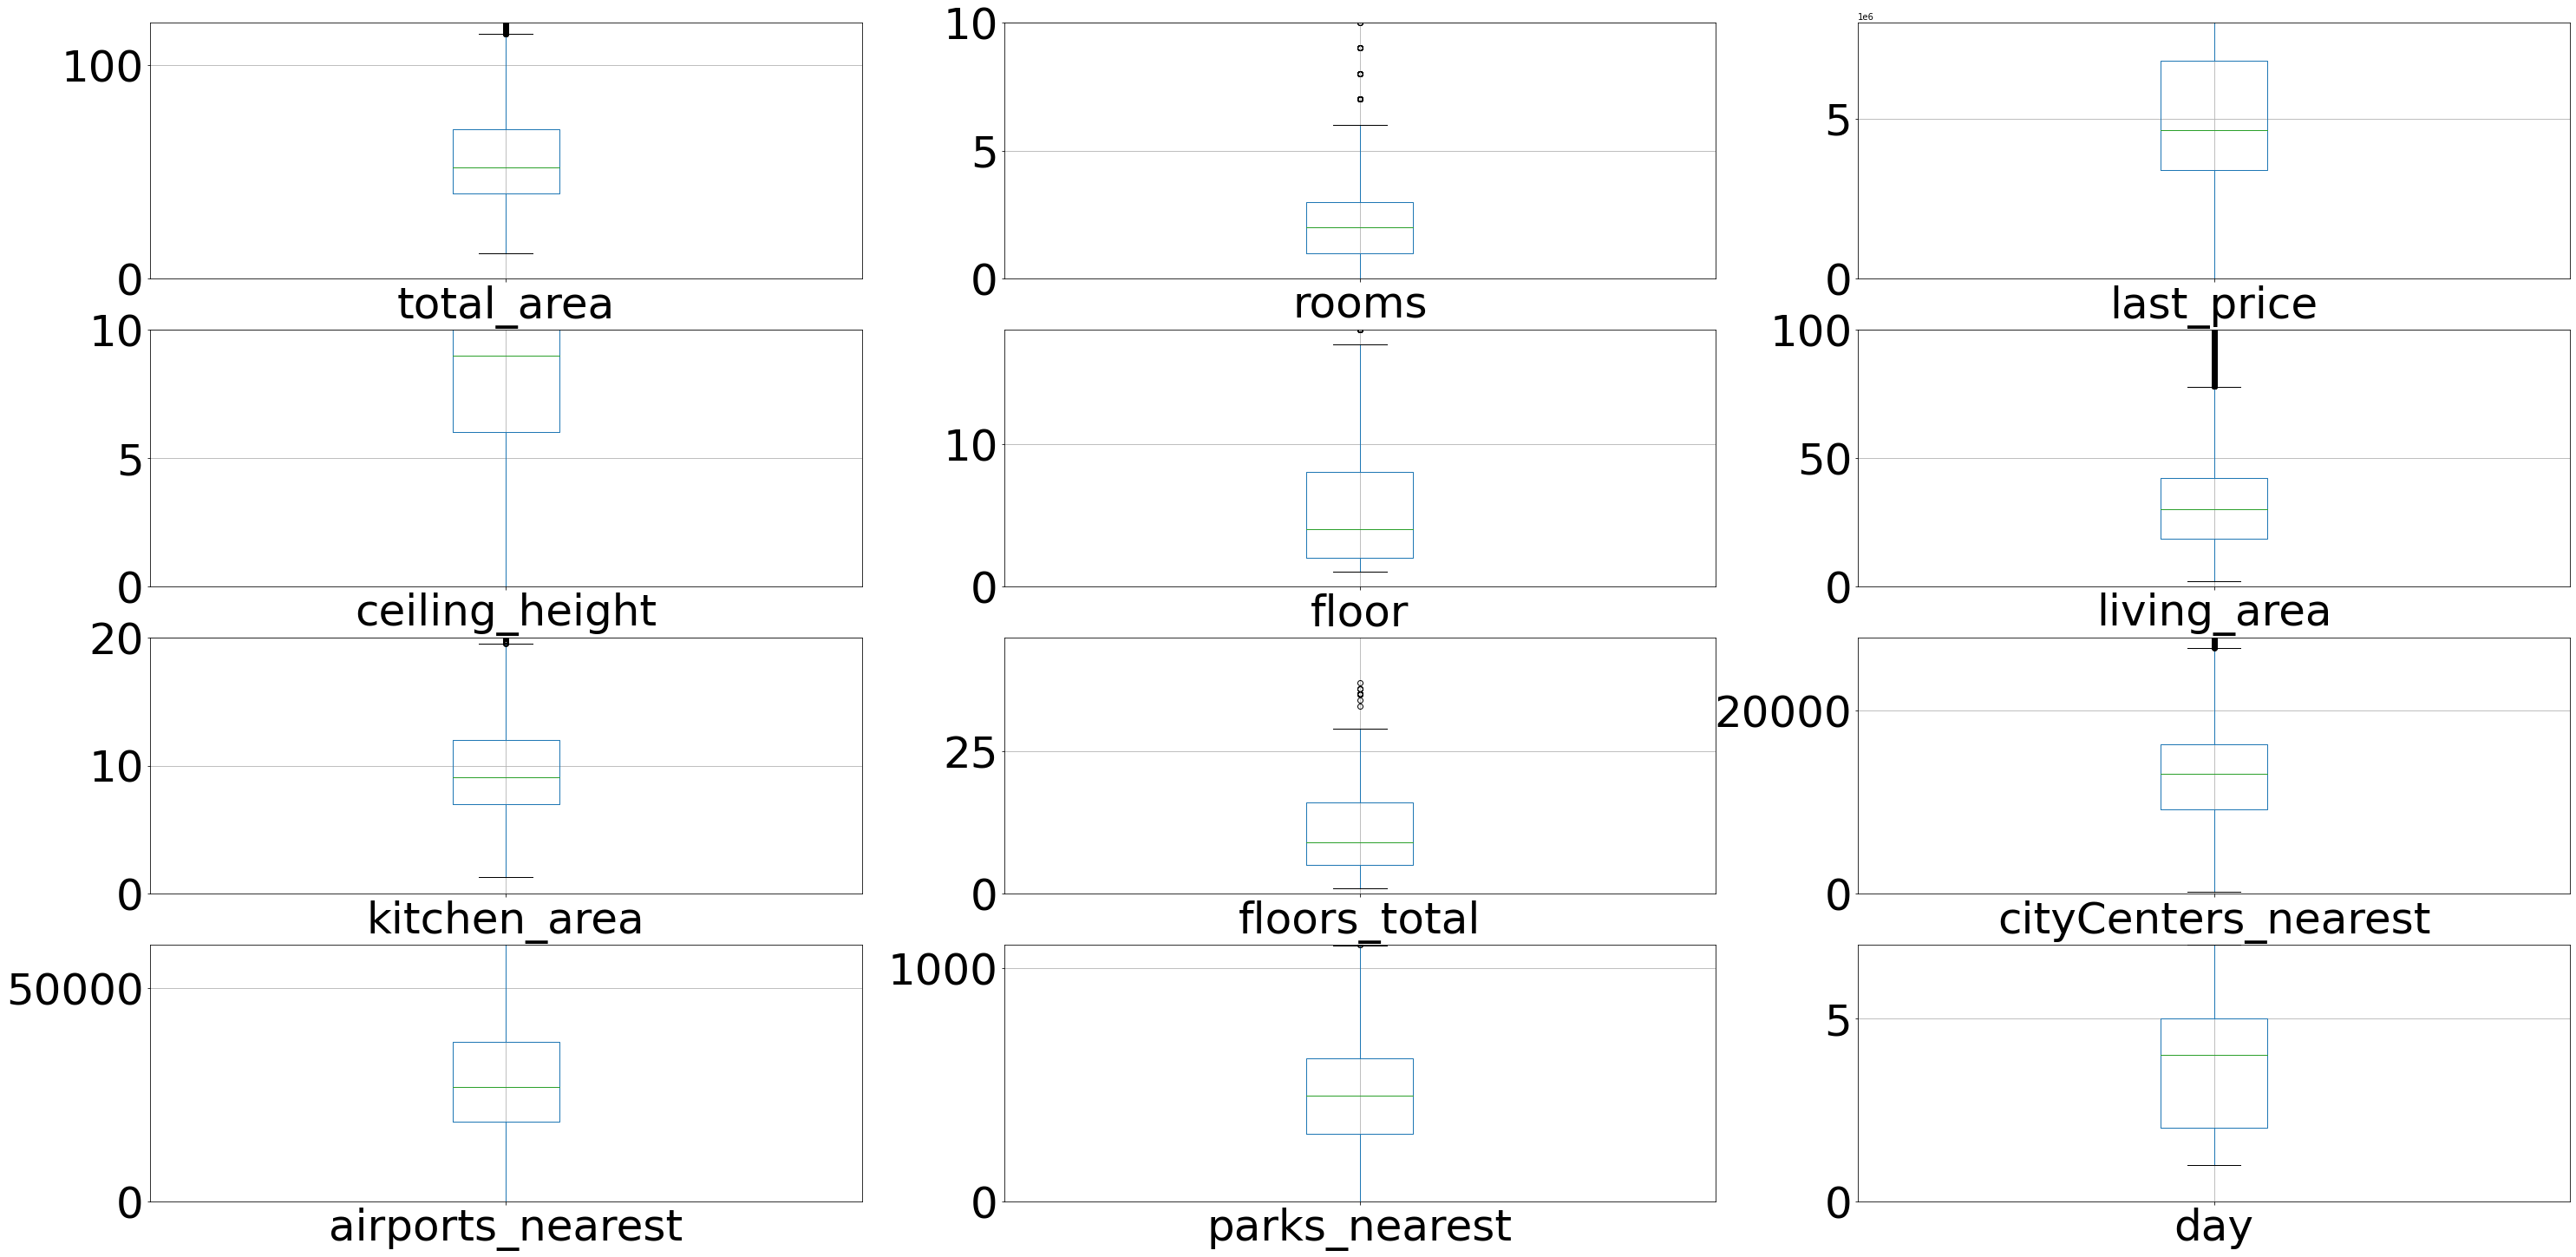

In [63]:
import matplotlib.pyplot as plt

rows = 4
cols = 3
fig,axes = plt.subplots(rows,cols,figsize = (50,25))
column_list = ['total_area','rooms','last_price','ceiling_height',
      'floor', 'living_area', 'kitchen_area', 
               'floors_total','cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day', 'month']
ylims = [120,10,8000000,10,18,100,20,45,28000,60000,1100,7,12]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data.boxplot(column = column_list[count], ax=axes[r,c], fontsize=50)
        ax.set_ylim([0,ylims[count]]) # pay attention for the next time
        count += 1

<AxesSubplot:>

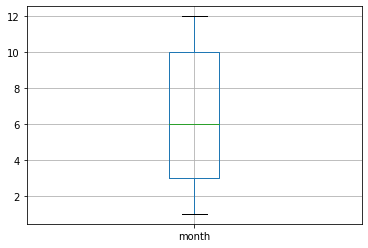

In [64]:
data.boxplot('month')

Определяем Границы:

- **total_area** - 15 до 120 м<sup>2<sup>
- **rooms** - 0 до 6 комнат
- **last_price** - 0 до 12 млн Р
- **ceiling_height** - 2.5 до 2.9 м
- floor - 0 до 18 потолоков
- living_area - 0  до 80 м <sup>2</sup>
- kitchen_area - 0 до 20 м <sup>2</sup>
- floors_total - 0 до 26 потолок
- cityCenters_nearest - 0 до 30000 м
- airports_nearest - 0 до 65000 м
- parks_nearest - 0 до 1000 м
- month - 1 до 12 месяцев

- rooms

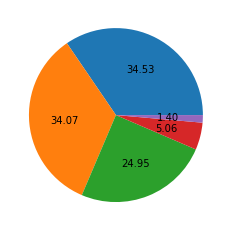

In [65]:
one_room = data.loc[data['rooms'] == 1].count()[0]
two_room = data.loc[data['rooms'] == 2].count()[0]
three_room = data.loc[data['rooms'] == 3].count()[0]
four_room = data.loc[data['rooms'] == 4].count()[0]
five_room = data.loc[data['rooms'] == 5].count()[0]
six_room = data.loc[data['rooms'] == 6].count()[0]
seven_room = data.loc[data['rooms'] == 7].count()[0]
plt.pie([one_room, two_room, three_room, four_room, five_room],autopct ='%.2f')

plt.show()

Text(0.5, 0, 'распределение по общей площади')

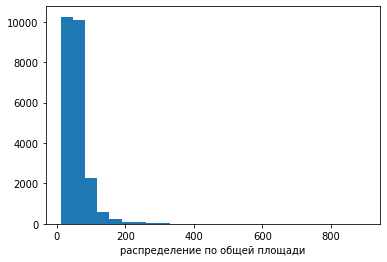

In [66]:
plt.hist(data.total_area, bins = 25)
plt.xlabel('распределение по общей площади')

Text(0.5, 0, 'распределение по площади кухон')

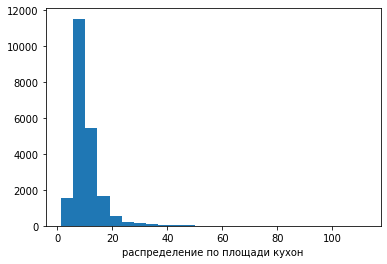

In [67]:
plt.hist(data.kitchen_area, bins = 25)
plt.xlabel('распределение по площади кухон')

Text(0.5, 0, 'распределение по жилой площади')

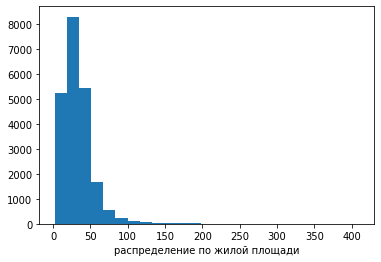

In [68]:
plt.hist(data.living_area, bins = 25)
plt.xlabel('распределение по жилой площади')

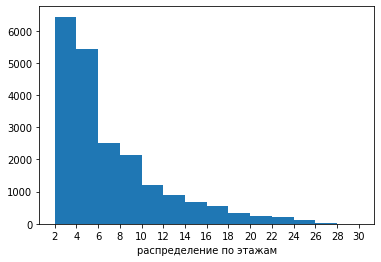

In [69]:
bins = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
plt.hist(data.floor, bins = bins)
plt.xlabel('распределение по этажам')
plt.xticks(bins)

plt.show()

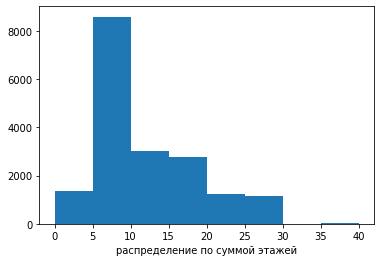

In [70]:
bins = [0,5,10,15,20,25,30,35,40]
plt.hist(data.floors_total, bins = bins)
plt.xlabel('распределение по суммой этажей')
plt.xticks(bins)

plt.show()

Text(0.5, 0, 'распределение по расстоянию от центра города')

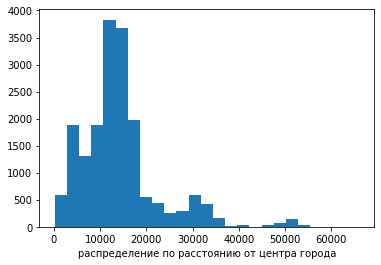

In [71]:
plt.hist(data.cityCenters_nearest, bins = 25)
plt.xlabel('распределение по расстоянию от центра города')

Text(0.5, 0, 'распределение по расстоянию от ближайщего аэропорта')

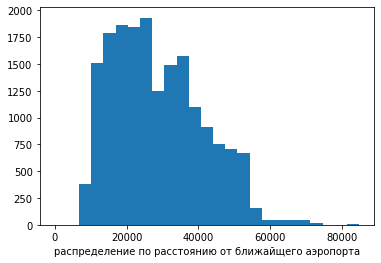

In [72]:
plt.hist(data.airports_nearest, bins = 25)
plt.xlabel('распределение по расстоянию от ближайщего аэропорта')

Text(0.5, 0, 'распределение по расстоянию от ближайщего парка')

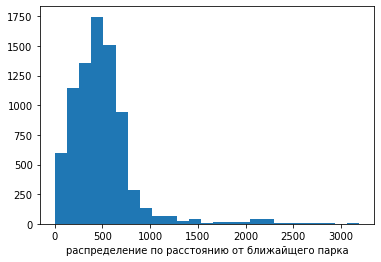

In [73]:
plt.hist(data.parks_nearest, bins = 25)
plt.xlabel('распределение по расстоянию от ближайщего парка')

Text(0.5, 0, 'распределение по дням')

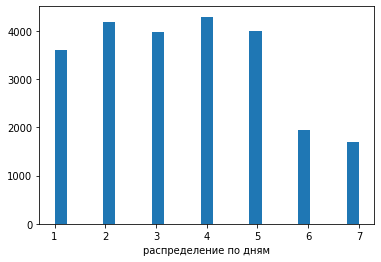

In [74]:
plt.hist(data.day, bins = 25)
plt.xlabel('распределение по дням')

Text(0.5, 0, 'распределение по месяцам')

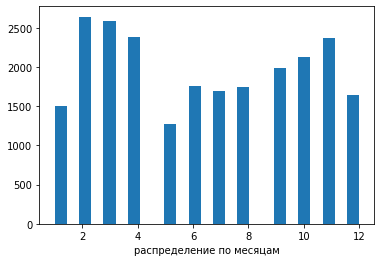

In [75]:
plt.hist(data.month, bins = 25)
plt.xlabel('распределение по месяцам')

Text(0.5, 0, 'распределение по высоты потолок')

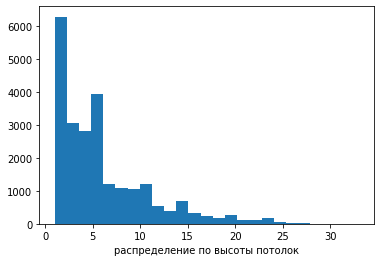

In [76]:
plt.hist(data.floor, bins = 25)
plt.xlabel('распределение по высоты потолок')

Text(0.5, 0, 'распределение цен')

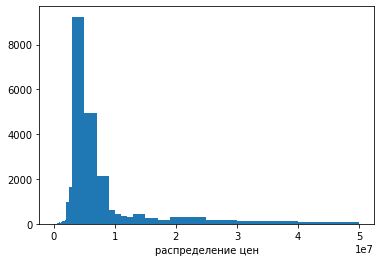

In [77]:
bins = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,
       1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000,2500000,
        3000000,5000000,7000000,9000000,10000000,11000000,12000000,13000000,15000000,
        17000000,19000000,25000000,30000000,40000000,50000000]
plt.hist(data.last_price, bins = bins)
plt.xlabel('распределение цен')


**Вывод:**

- Гистограмма "Распределение площадей": Большая часть квартир имеет метраж от 30 до 80 кв.м., пик приходится на 50 кв.м. Есть квартиры и по 800м<sup>2</sup>, но это единичные выбросы.
- Гистограмма "Распределение цен": цена на квартиры лежит в промежутке от 3 до 12 млн. Большаячасть квартир продается за цену в промежутке между 3 и 6 млн. Опять же, есть выбросы, но ничего.
- Круговая диаграмма "Распределение по количеству комнат": 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их процент сильно ниже.
- Гистограмма "Распределение по высоте потолков": квартиры, в большинстве своем, имеют потолки от 2,5-2,75м (самый популярный вариант) до 3,2м. Остальные случаи - эксклюзивы.
- гистограмма "Распределение по этажам" : есть комнат,находящихся на высокие этажи, но  маловероятно такие квартиры находить.Большая часть квартир находяться на первые 10 этажи.Это,насколько я считаю зависит от того,по скольку человек готов платить больше ради этажа квартиры.
- Гистограмма "Распределение по жилой площади": в основном, большая часть квартир имеет жилую площадь с 13 м <sup>2</sup> до 50 м <sup>2</sup>, но у нас существуюет болшая видная яма для квартир с жилой площадью с 22 м <sup>2</sup> до 25 м <sup>2</sup>.Существует избыточный спрос на квартиры с жилой площадью 18 м<sup>2</sup>  и 30 м<sup>2</sup> . Общая категория общества покупает квартиры с жилой площадью, равной 18 квадратным метрам, в то время как для категории, которая имеет возможность продавать квартиры с жилой площадью выше 18 квадратных метров, она начинает отдавать предпочтение более крупным площадям для развития.

- Гистограма "Распределение по площади кухон" - большая часть находиться между 5 м <sup>2</sup> и 15 м <sup>2</sup> , остальное можно считать как выброс
- Гистограмма "Распределение по конечной суммы этажей" - большая часть квартир распределена на первых 25 этажах. Многие здания имеют в общей сложности 20-25 этажей
- Гистограмма "Распределение по по расстоянию от центра города" - большая часть квартир распределена в диапазоне от 5 до 20 км, другие случаи могут быть редки. Также существует небольшой разрыв между расстоянием 7 км и 9 км от центра города, это связано с наличием  мало квартир, которые находятся достаточно близко к городу, но далеко от основных групп квартир в том районе, который дается.
- Гистограмма "Распределение по по расстоянию от ближайщего аэропорта" - большая часть находиться между 10 км  и 55 км  , остальные значения - выбросы
- Гистограмма "Распределение по по расстоянию от ближайщего парка" - большая часть находиться между 0 м  и 800 м  , остальные значения - выбросы
- Гистограмма "Распределение по дням" - большая часть находиться между 1 день и 5 дней , в начале месяца удобнее видимо,всем сделать оформление на платформе

- Гистограмма "Распределение по дням" - большая часть находиться между 5 м <sup>2</sup> и 15 м <sup>2</sup> , остальное можно считать как выброс


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          18180 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<font size="3"> <b> Задача 2 <b></font>

#### Зч. 2 Посмотрим на данные и гистограмму по времени продажи квартиры

In [79]:
data['days_exposition'].describe().to_frame()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


In [80]:
data['days_exposition'].median()
# на 96 дней интереса я думаю нормально. Но на 1500 дней (почти 5 лет) многовато

95.0

Есть квартиры, которые продавались **5 лет?** Вполне возможно, но, как я предполагал ранее, есть вероятность, что это те объявления, которые вовремя не были закрыты, из-за этого срок продажи не соответствует реальным и имеет очень большое значение.
**Среднее время продажи - полгода**, 180 дней. **Медианное - 95 дней.**

**3 месяца** для продажи квартиры - очень неплохой срок.

<AxesSubplot:>

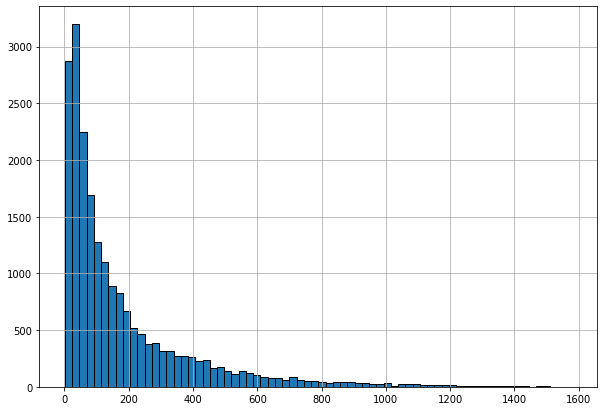

In [81]:
data['days_exposition'].hist(bins = 70,figsize = (10,7), ec = 'black')

Большая часть квартир продавалась в течение первых **50 дней, есть и квартиры,** которые продавались **до года**. Чем дальше, тем реже встречаются такие случаи.

Посмотрим на boxplot:

<AxesSubplot:>

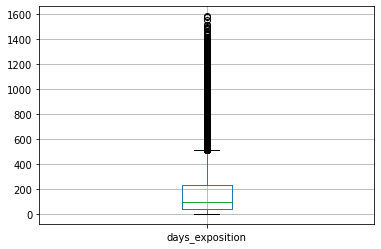

In [82]:
data.boxplot(column = 'days_exposition')

Ограничу срок продажи 400 днями, чтоб убрать выбросы. Посмотрим на данные более детально:

<AxesSubplot:>

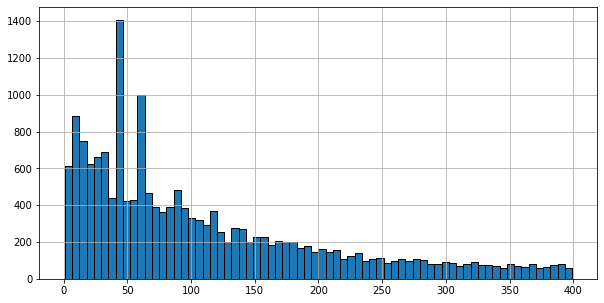

In [83]:
data.query('days_exposition < 400')['days_exposition'].hist(bins = 70,figsize = (10,5),ec = 'black')

Всё осталось прежним - чаще всего квартиры продаются в срок от 45 до 100 дней.

Давайте посмотрим ближе на пределе от 45 до 100 дней (есть три основных пика)

<AxesSubplot:>

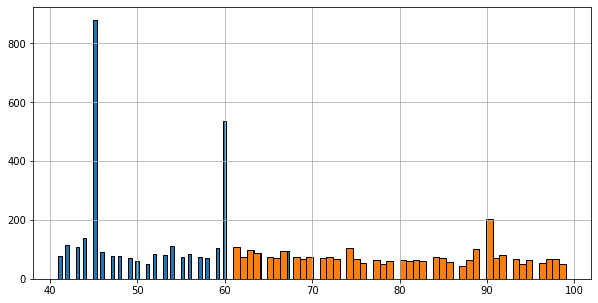

In [84]:
data.query('40< days_exposition < 70')['days_exposition'].hist(bins = 70,figsize = (10,5),ec = 'black')
data.query('60< days_exposition < 100')['days_exposition'].hist(bins = 50,figsize = (10,5),ec = 'black')

Выглядит крайне странно. Вполне возможно, что сделки закрываются следующим образом: раз в 15/30 дней или на почту продавцу приходит вопрос, продал ли он квартиру, он заходит и делает соответствующую пометку, или ему звонит оператор и по телефону задает тот же вопрос и закрывает/не закрывает объявление согласно полученной информации. Таким образом, учитывая то, что многие самостоятельно не закрывают объявления, что большая часть квартир продается в пределах 60 дней с момента публикации объявления и что проверка производится раз в 15/30 дней, имеем такие вот данные. 

<AxesSubplot:>

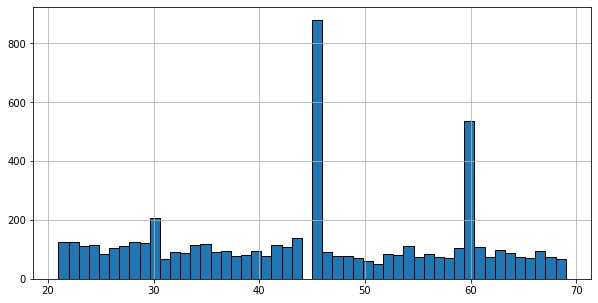

In [85]:
data.query('20< days_exposition < 70')['days_exposition'].hist(bins = 50,figsize = (10,5),ec = 'black')

Можно с уверенностью сказать, что теория подтвердилась.

<a name="3.3."></a><font size="3"><b>Задача 3.</font></b>

Зависимость цены от количество комнат, этажа, удалённости от центра и даты размещения объявления<br/>
<font size="2">

#### Зч.3 Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от числа комнат, этажа и удалённости от центра

Для прорисовки графиков напишем <b>функцию</b>:

In [86]:

def depend_price(df, column):
    title_dict = {'total_area': 'зависимость цены от общей площади', 
                  'living_area': 'зависимость цены от жилой площади', 
                  'kitchen_area': 'зависимость цены от площади кухни', 
                  'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  'fromcenter_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest_kms': 'Зависимость цены от удаленности от центра города'}
    plt.style.use('seaborn-pastel')
    
    if column == 'level' or column == 'fromcenter_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'fromcenter_category':
        fontsize = 12
    else:
        fontsize = 10
    if column == 'cityCenters_nearest_kms':
        fontsize = 9
        
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(10,5))
    ax2 = plt.gca()  # удалим xlabel - у нас и так есть многоговорящее название графика
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_nearest_kms':
        plt.xticks(rotation=0)
    else:
        plt.xticks(rotation=90)
    return plot



Я не мог знать, как создать функцию, которая может пометить следующие все функции без выбросов

In [87]:
def price2(df,column):
    df = data.groupby(column).median()['last_price'].reset_index().sort_values(by = column)
    plot = df.plot(x=column, y='last_price',figsize = (10,5))
    return plot

<AxesSubplot:xlabel='total_area'>

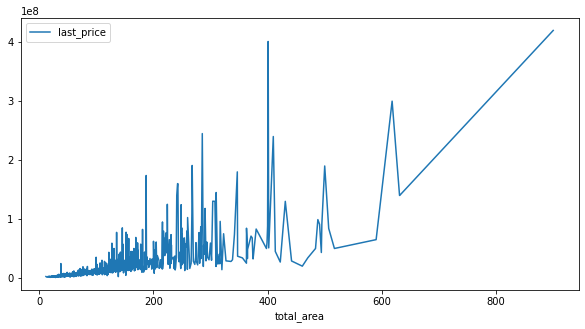

In [88]:
price2(data,'total_area')

<AxesSubplot:>

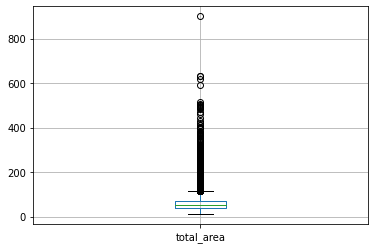

In [89]:
data.boxplot('total_area')

<AxesSubplot:xlabel='living_area'>

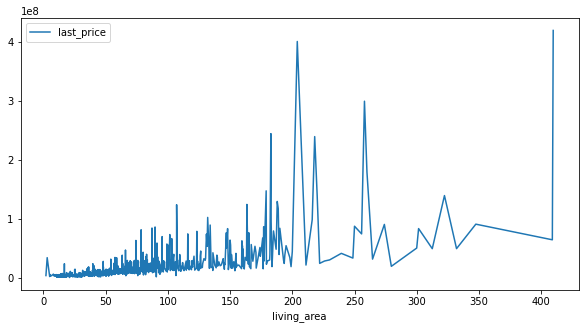

In [90]:
price2(data,'living_area')

<AxesSubplot:>

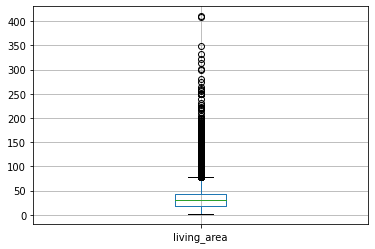

In [91]:
data.boxplot('living_area')

<AxesSubplot:xlabel='kitchen_area'>

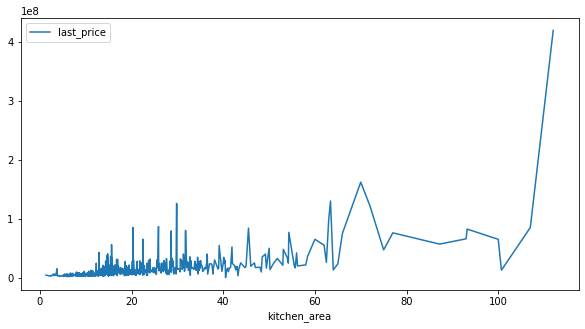

In [92]:
price2(data,'kitchen_area')

Смотрим зависимость цены от <b>количества комнат</b>:

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

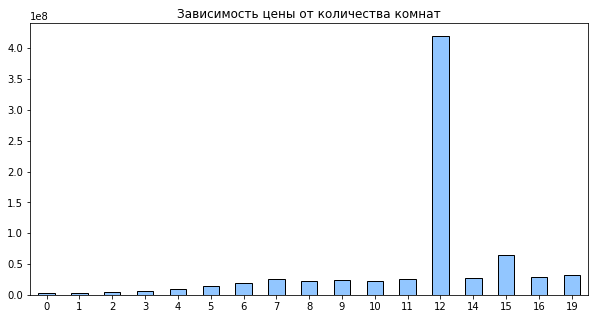

In [93]:
depend_price(data,'rooms')

Посмотрим на выбросы:

<AxesSubplot:>

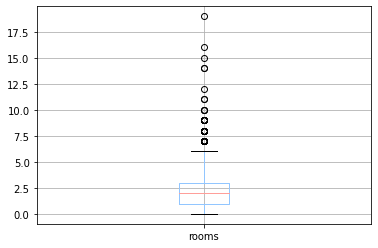

In [94]:
data.boxplot(column = 'rooms')

Смотрим без выбросов:

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

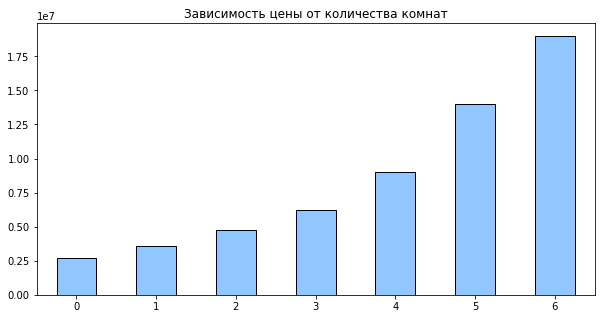

In [95]:
depend_price(data.query('rooms<=6'), 'rooms')

Всё так. Чем больше комнат, тем выше цена - так продолжается до 7 комнат. Далее - единичные значения (выбросы). Вполне возможно, что дальше идут бывшие коммуналки на продажу?

Теперь берёмся за <b>этажи</b> (по категориям: 'первый', 'последний', 'другой').

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='level'>

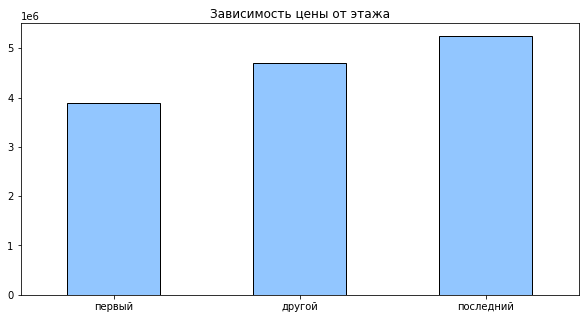

In [96]:
depend_price(data,'level')

Цены на квартиры на 1ом этаже в среднем на %20 ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. На последнем этаже, конечно, подороже, чем на 1ом, но дешевле чем на других.

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра города'}, xlabel='fromcenter_category'>

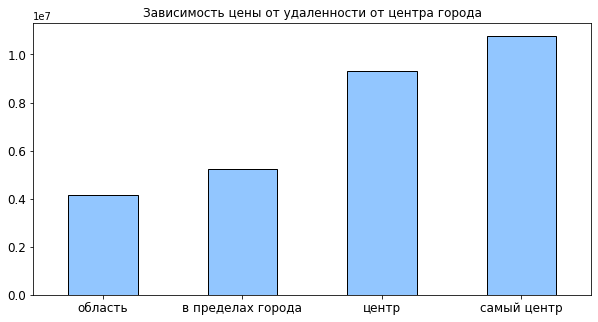

In [97]:
depend_price(data,'fromcenter_category')

чем дальше от города,тем дешевле

In [98]:
def dmy_price(df,ylims = None):
    dmy_to_plot = ['day','month','year']
    titles = ['медиана цен по дню', 'мелиана цен по месяцу', 'мелиана цен по году']

    for i in range(len(dmy_to_plot)):
        df_to_plot = data.groupby(dmy_to_plot[i]).median()['last_price'].reset_index().sort_values(by = dmy_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x= dmy_to_plot[i],y = 'last_price', kind = 'bar', figsize = (10,5),ec = 'black',
                                   legend = False, title = titles[i], fontsize = 20)
        else:
            plot = df_to_plot.plot(x= dmy_to_plot[i],y = 'last_price', kind = 'bar', figsize = (10,5),ec = 'black',
                                   legend = False, title = titles[i], fontsize = 20, ylim = ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if dmy_to_plot[i] != 'day':
            plt.xticks(rotation = 0 )
    return plot


<AxesSubplot:title={'center':'мелиана цен по году'}, xlabel='year'>

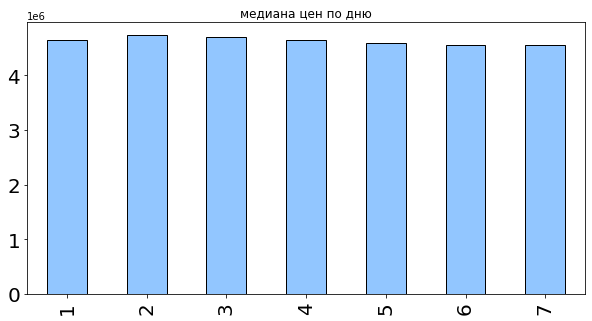

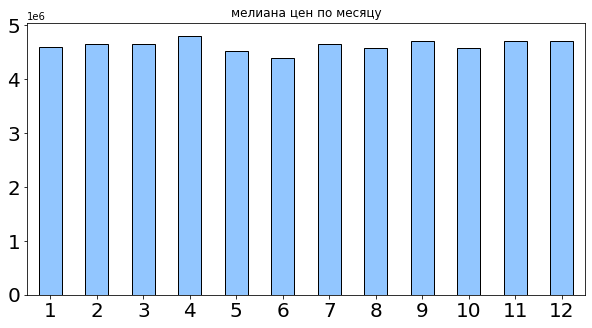

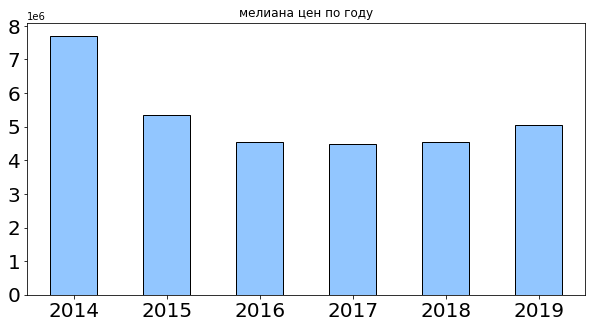

In [99]:
dmy_price(data)

Из этих данных ничего не ясно. Увеличим размеры каждого графика по вертикали и ограничим каждый график по оси Oy интервалом значений (4000000, 4900000) для дня недели и месяца и (4000000, 8000000) для года:

<AxesSubplot:title={'center':'мелиана цен по году'}, xlabel='year'>

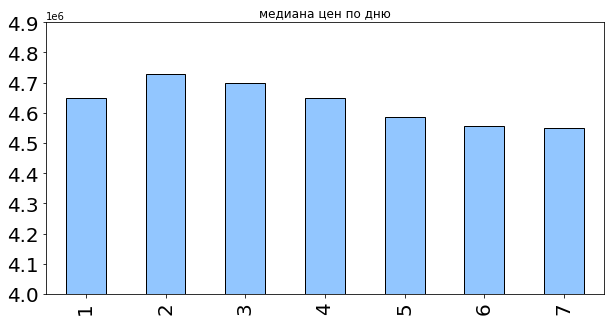

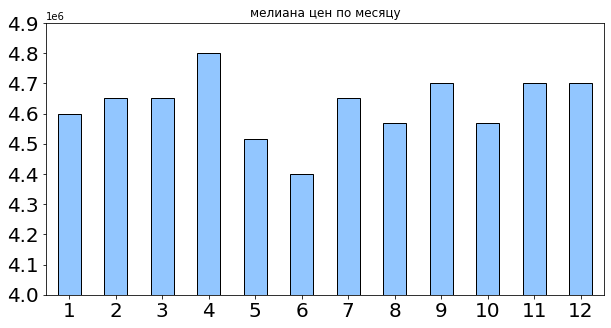

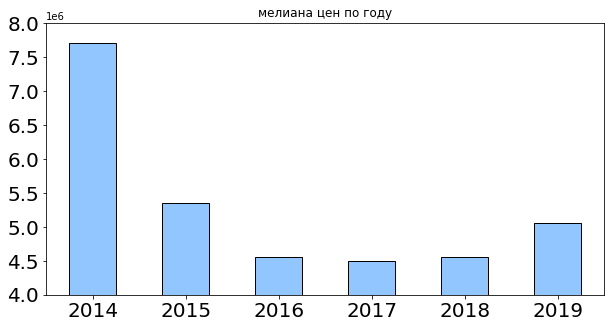

In [100]:
dmy_price(df=data, ylims=[(4000000, 4900000), (4000000, 4900000), (4000000, 8000000)])

Теперь можно и обсудить:

- зависимость цены от дня недели публикации практически никак не зависит. Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни;
- зависимость цены от месяца публикации - апрель оказался самым "деловым": цены на квартиры, чьи объявления о продаже были опубликованы в апреле, выше, чем по остальным месяцам. Особенно выделяется медиана цен на квартиры по июньским объявлениям - довольно низкие в сравнении с другими месяцами;
- зависимость цены от года публикации - 2014г. тут очень выделяется. Рассмотрим его чуть подробнее (по месяцам) и сделаем общий вывод про зависимость цены от года публикации:

<AxesSubplot:title={'center':'Медиана цен по месяцам'}, xlabel='month'>

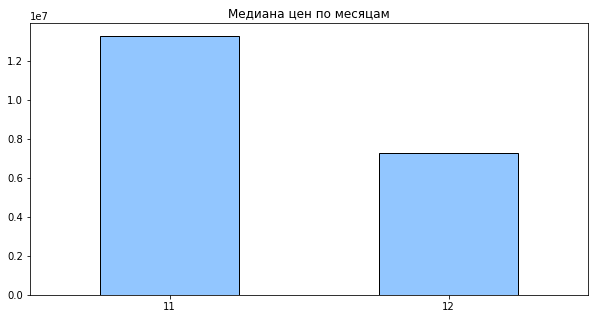

In [101]:
depend_price(data.query('year == 2014'), 'month')

Видим, что наши в наших данных есть информация только о 11 и 12 месяцах 2014 года (и позднее).
Предполагаю, что такие высокие цены были вызваны ажиотажем на рынке недвижимости, вызванным довольно скоротечным ослаблением рубля. По этой причине, спрос мог превышать предложение (учитывая то, какими активными участниками рынка стали те же граждане СНГ, у которых валюта пока не ослабла), отсюда и цены такие.
К декабрю всё пошло на убыль, т.к.:

валюты граждан других близележащих стран тоже начали слабеть;
в предновогодний месяц вряд ли вообще рынок недвижимости такой активный.
В 2019г. цена стала опять расти. Предполагаю, что связано с тем, что после 5 лет застоя рынок недвижимости проснулся - больше и больше граждан могут себе позволить приобрести недвижимость. Рост спроса -> рост цен.

<a name="3.3."></a><font size="3"><b>Задача 4.</font></b>

#### Зч.4 Средняя цена

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Данные берем из столбца locality_name.

In [102]:
top10 = data['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [data[data['locality_name'] == city]['price_of_1m2'].median().round(2) for city in top10]
mean10_prices = [data[data['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 'Средняя цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe


,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,99375.00,5000000.0
3,None,79576.44,4411000.0
1,Поселок,71955.76,3200000.0
2,Деревня,68737.50,3100000.0
4,Садовое товарищество,37777.78,1800000.0


Как и ожидалось, самые дорогие квартиры (что за всё жилье, что за 1 кв.м.) в Санкт-Петербурге и парковом городе Пушкине. Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

<a name="3.3."></a><font size="3"><b>Задача 5.</font></b>

#### Зч.5 выделите квартиры в Санкт-Петербурге и их стоимости

Изучим предложения квартир. Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [103]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb.loc[:, 'cityCenters_nearest_kms'] = (data_spb.loc[:, 'cityCenters_nearest']/1000).round()
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,fromcenter_category,price_of_1m2,day,month,year,level,living_area_part,kitchen_area_part,cityCenters_nearest_kms
0,20,13000000,108.0,2019-03-07,3,20.0,16.0,51.0,8,True,...,NaN,в пределах города,120370.37,4,3,2019,другой,0.47,0.23,16.0
2,10,5196000,56.0,2015-08-20,2,10.0,5.0,34.3,4,True,...,558.0,в пределах города,92785.71,4,8,2015,другой,0.61,0.15,14.0
3,0,64900000,159.0,2015-07-24,3,0.0,14.0,NaN,9,True,...,424.0,в пределах города,408176.10,5,7,2015,другой,NaN,NaN,7.0
4,2,10000000,100.0,2018-06-19,2,2.0,14.0,32.0,13,True,...,121.0,в пределах города,100000.00,2,6,2018,другой,0.32,0.41,8.0
7,5,7915000,71.6,2019-04-18,2,5.0,24.0,NaN,22,True,...,NaN,в пределах города,110544.69,4,4,2019,другой,NaN,0.26,12.0


Строим график медианной цены в зависимости от удаленности от города:

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра города'}, xlabel='cityCenters_nearest_kms'>

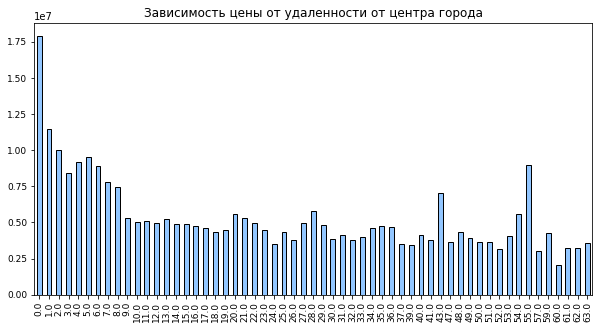

In [104]:
depend_price(data_spb, 'cityCenters_nearest_kms')


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          18180 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Ожидаемо, что в самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 20 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра. Предполагаю, что это влияние на чуть более высокую, чем ожидалось, медианную цену оказывают определенные районы типа Василеостровского, Приморского и Петроградского, которые не считаются центральными, но при этом считаются достаточно элитными.


---

Прошу заметить, что на графике присутствуют значения по расстоянию от центра, превышающие 17 км, которые мы определили ранее. Тем не менее, название населенного пункта в этих столбцах - "Санкт-Петербург". Посмотрим на их количество:

In [106]:
data_spb.query('cityCenters_nearest_kms > 17').sort_values(by='cityCenters_nearest_kms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,fromcenter_category,price_of_1m2,day,month,year,level,living_area_part,kitchen_area_part,cityCenters_nearest_kms
18884,15,3600000,57.60,2019-02-08,3,15.0,3.0,41.3,2,True,...,13.0,область,62500.00,5,2,2019,другой,0.72,0.11,63.0
2974,13,3200000,46.30,2018-03-31,2,13.0,3.0,29.2,2,True,...,205.0,область,69114.47,6,3,2018,другой,0.63,0.15,62.0
16569,13,3200000,52.80,2017-06-20,2,13.0,5.0,29.9,3,True,...,240.0,область,60606.06,2,6,2017,другой,0.57,0.16,61.0
4441,6,2300000,31.00,2016-05-26,1,6.0,3.0,12.0,1,True,...,232.0,область,74193.55,4,5,2016,первый,0.39,0.29,60.0
23123,0,1800000,32.00,2018-07-17,1,0.0,2.0,17.0,1,True,...,147.0,область,56250.00,2,7,2018,первый,0.53,0.19,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,12,3900000,47.00,2015-12-01,1,12.0,23.0,16.0,2,True,...,327.0,область,82978.72,2,12,2015,другой,0.34,0.28,18.0
11195,8,4950000,44.70,2018-08-28,1,8.0,26.0,18.2,15,True,...,95.0,область,110738.26,2,8,2018,другой,0.41,0.28,18.0
11295,12,5250000,42.97,2017-08-03,1,12.0,19.0,20.0,7,True,...,172.0,область,122178.26,4,8,2017,другой,0.47,0.28,18.0
5151,13,4500000,41.00,2019-03-26,1,13.0,17.0,17.3,11,True,...,NaN,область,109756.10,2,3,2019,другой,0.42,0.25,18.0


Могу предположить, что центр мог считаться не историческим центром Санкт-Петербурга, а какой-либо другой точкой, или же расстояние считалось не по прямой, а по дорогам. А может быть, это Кронштадт, который считается Санкт-Петербургом. Особенно если посмотреть на 27 км от центра, где цены от жилья неожиданно высокие по сравнению с соседними значениями - могут сравниться с ценами в пределах центральной зоны Санкт-Петербурга. В том или ином случае, оставим это как есть, раз информация уже присутствовала в таблице. Тем более, квартир с такими параметрами не так много.

Выводы:

**День размещения объявления**:

Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.	

**Месяц размещения объявления**:

Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие.	

*Год размещения объявления**:
Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - рецессия экономики - цены пошли вверх впервые после наступления кризиса.

### **Шаг 5**: Общий вывод

<html>
<head>
<title>HTML код таблицы, примеры</title>
</head>
<body>
<table border="1">
<tr>
<td> &nbsp; </td>
<td><b>Метраж</b></td>
<td><b>Цена за квадратный метр</b></td>
<td><b>Доля жилой площади/кухни</b></td>
<td><b>Количество комнат</b></td>
<td><b>Этаж</b></td>    
<td><b>Удаленность от центра</b></td>
<td><b>День размещения объявления</b></td>
<td><b>Месяц размещения объявления</b></td>
<td><b>Год размещения объявления</b></td>
</tr>
<tr>
<td style="background-color:#ffffcc"><b>Наблюдения</b> </td>
<td>Чем больше площадь квартиры, тем выше цена</td>
<td>Чем больше цена за квадратный метр, тем выше цена</td>
<td>Чем выше доля жилой площади/площадь кухни, тем выше цена</td>
<td>Чем больше комнат, тем выше цена</td>
<td>На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных</td>
<td>Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.</td>
<td>Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.</td>
<td>Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие.</td>
<td>Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - рецессия экономики - цены пошли вверх впервые после наступления кризиса.</td>
</tr>
</table>
</body>
</html>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод